In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


# Completo datos faltantes del DataFrame

Completo el dataframe con los datos faltantes en las columnas de m² (`metrostotales` y `metroscubiertos`).
Si no tengo una de las dos, reemplazo con el valor de la otra. Si tengo ambos, no hago nada. Si no tengo ninguna, filtro dicha propiedad del análisis.

In [5]:
props_a_filtrar = df.loc[df['metroscubiertos'].isna() & df['metrostotales'].isna()][['metrostotales', 'metroscubiertos']].size

print(f'Hay que filtrar {props_a_filtrar} propiedades ya que no hay datos de m²')

Hay que filtrar 0 propiedades ya que no hay datos de m²


In [6]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      51467
metroscubiertos    17400
dtype: int64

In [7]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [8]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      0
metroscubiertos    0
dtype: int64

In [9]:
df['precioUSD'] = df['precio'] / 20
df['preciom2USD'] = df['precioUSD'] / df['metrostotales']

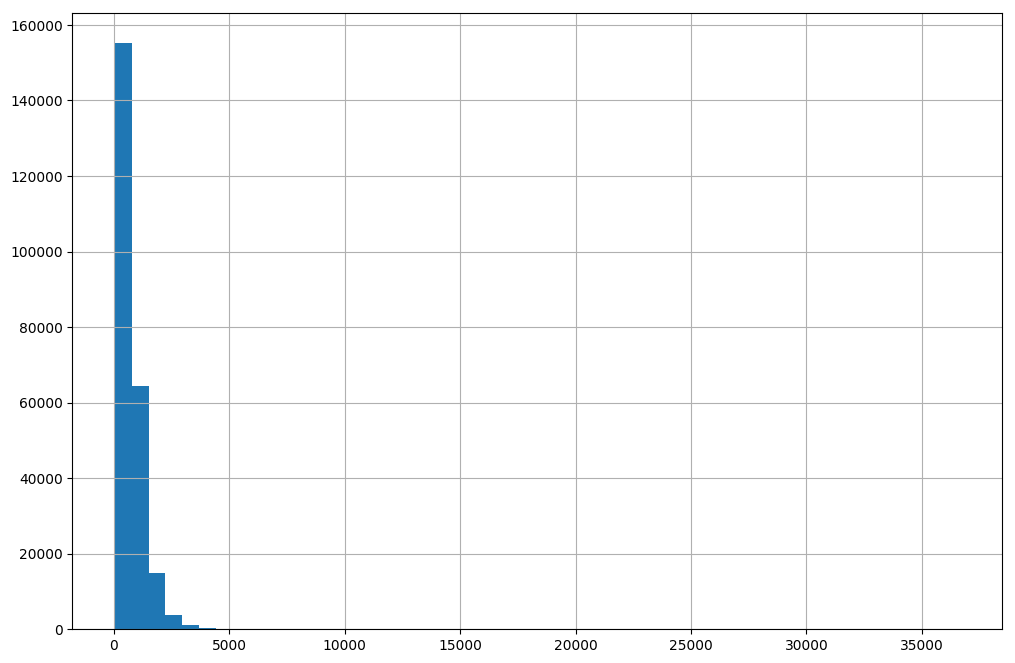

In [10]:
df['preciom2USD'].hist(bins=50);

In [11]:
df.describe(percentiles=[0.01, 0.05, 0.1, 0.9, 0.95, 0.99, 0.995, 0.999]).T

,count,mean,std,min,1%,5%,10%,50%,90%,95%,99%,99.5%,99.9%,max
id,240000.0,1.499694e+05,8.663458e+04,1.000000,3013.990000,14998.950000,29932.800000,1.498755e+05,2.700371e+05,2.850670e+05,2.970520e+05,2.985380e+05,2.997250e+05,2.999990e+05
antiguedad,196445.0,8.116114e+00,9.553830e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+00,2.000000e+01,2.600000e+01,4.500000e+01,5.000000e+01,6.000000e+01,8.000000e+01
habitaciones,217529.0,2.902326e+00,8.968942e-01,1.000000,1.000000,2.000000,2.000000,3.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01,1.000000e+01
garages,202235.0,1.546874e+00,8.535075e-01,0.000000,0.000000,0.000000,0.000000,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
banos,213779.0,2.132417e+00,9.125460e-01,1.000000,1.000000,1.000000,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
metroscubiertos,240000.0,1.803458e+02,1.010691e+02,15.000000,43.000000,56.000000,65.000000,1.600000e+02,3.360000e+02,3.800000e+02,4.200000e+02,4.300000e+02,4.370000e+02,4.390000e+02
metrostotales,240000.0,1.771770e+02,9.853175e+01,15.000000,43.000000,60.000000,68.000000,1.520000e+02,3.300000e+02,3.800000e+02,4.200000e+02,4.300000e+02,4.370000e+02,4.390000e+02
idzona,211379.0,2.423468e+06,1.056794e+07,22.000000,2485.000000,15160.000000,23533.000000,5.638300e+04,2.767410e+05,3.430150e+05,5.000400e+07,5.000400e+07,5.000400e+07,5.000400e+07
lat,116512.0,2.069682e+01,3.137884e+00,-100.886679,16.772501,18.944295,19.115222,1.954327e+01,2.550974e+01,2.578614e+01,3.245487e+01,3.249672e+01,3.261797e+01,8.302622e+01
lng,116512.0,-9.950922e+01,9.744143e+00,-125.859375,-116.886557,-106.140779,-103.460789,-9.924039e+01,-9.821851e+01,-9.183361e+01,-8.682981e+01,-4.448381e+00,1.008284e+00,1.210360e+02


Tenemos outliers que nos sesgan el análisis. Procedemos a filtrarlos

In [12]:
quantile_1 = df['preciom2USD'].quantile(.01)
quantile_99 = df['preciom2USD'].quantile(.99)
quantile_995 = df['preciom2USD'].quantile(.995)
df_filtrado = df.loc[df['preciom2USD'] < quantile_995]
#df_filtrado = df.loc[(df['preciom2USD'] < quantile_99)]

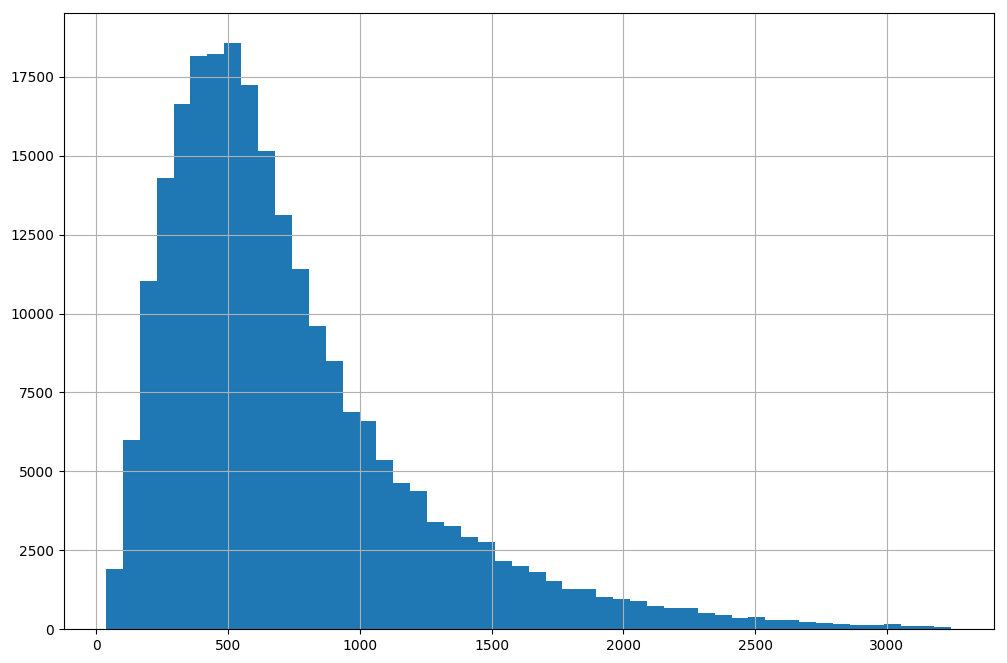

In [13]:
df_filtrado['preciom2USD'].hist(bins=50);

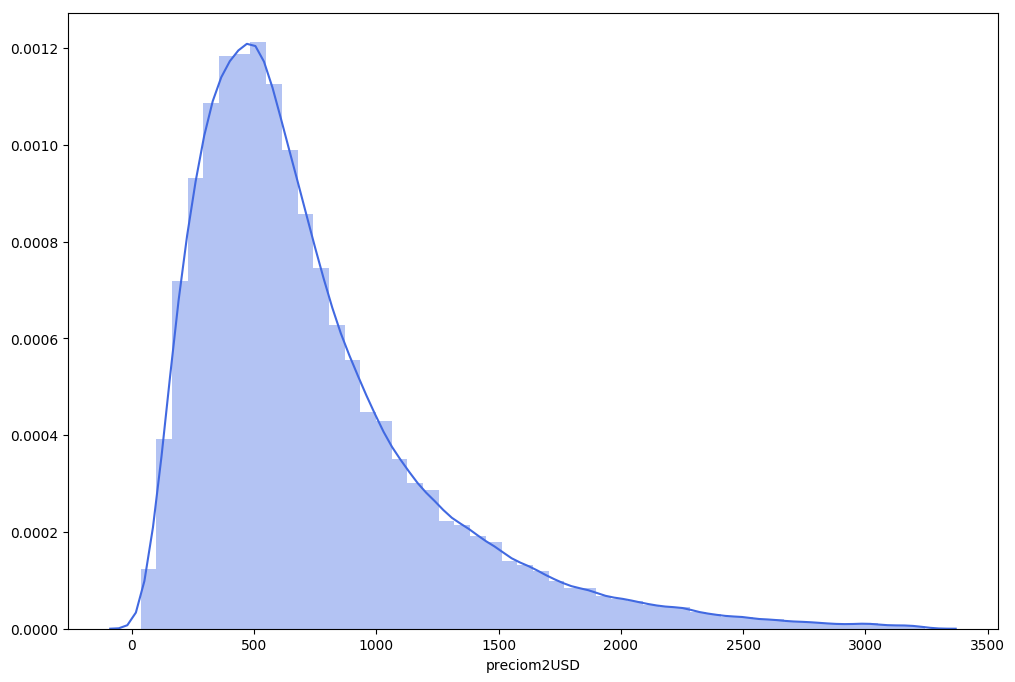

In [14]:
sns.distplot(df_filtrado['preciom2USD'], color='royalblue');

Luego del filtrado nos quedó una distribución más uniforme.

In [15]:
 print(f'Eliminamos {len(df) - len(df_filtrado)} propiedades')

Eliminamos 1205 propiedades


In [16]:
df = df_filtrado
del df_filtrado

## Top 10 provincias con el metro cuadrado más caro

In [38]:
media_m2_por_provincia = df.groupby('provincia').agg({'preciom2USD': 'mean'}).reset_index()\
                        .rename(columns={'preciom2USD': 'avg precio por m2 en USD'})\
                        .sort_values('avg precio por m2 en USD', ascending=False)

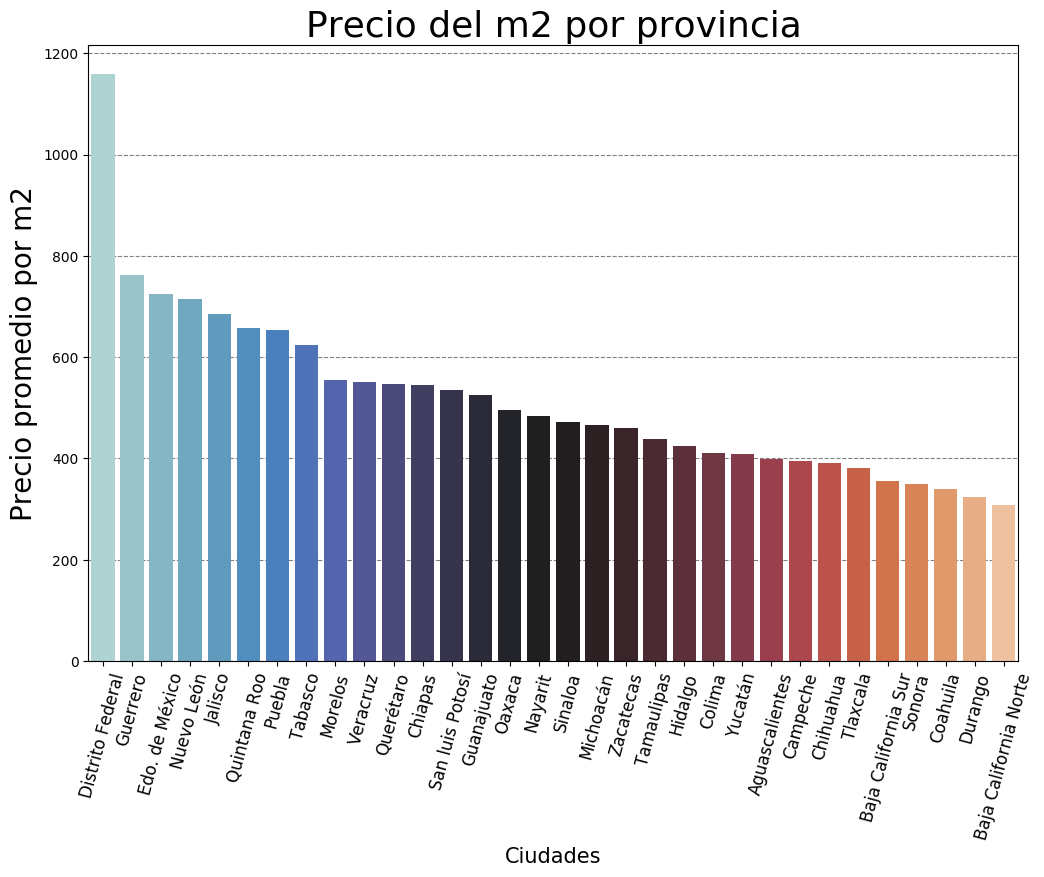

In [39]:
ax = sns.barplot(x=media_m2_por_provincia['provincia'], y=media_m2_por_provincia['avg precio por m2 en USD'], palette='icefire')
ax.set_xlabel('Ciudades', fontsize=15)
ax.set_ylabel('Precio promedio por m2', fontsize=20)
ax.tick_params(axis='x', labelrotation=75, labelsize=12)
ax.grid(linestyle='dashed', color='gray')
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Precio del m2 por provincia', fontsize=26);

## Top 15 ciudades con el metro cuadrado más caro

In [41]:
df['ciudad-provincia'] = df['ciudad'] + ', ' + df['provincia']
media_m2_por_ciudad = df.groupby('ciudad-provincia').agg({'preciom2USD': 'mean'}).reset_index()\
                        .rename(columns={'preciom2USD': 'avg precio por m2 en USD'})\
                        .sort_values('avg precio por m2 en USD', ascending=False)

In [75]:
def plot_ciudades(df, strtitle):
    ax = sns.barplot(x=df['avg precio por m2 en USD'], y=df['ciudad-provincia'], palette='icefire', orient='h')
    ax.set_ylabel('Ciudades', fontsize=20)
    ax.set_xlabel('Precio promedio por m2', fontsize=20)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=15)
    ax.grid(linestyle='dashed', color='gray')
    ax.yaxis.grid(False)
    ax.set_axisbelow(True)
    ax.set_title(f'Las 15 ciudades con el metro cuadrado más {strtitle}', fontsize=26);

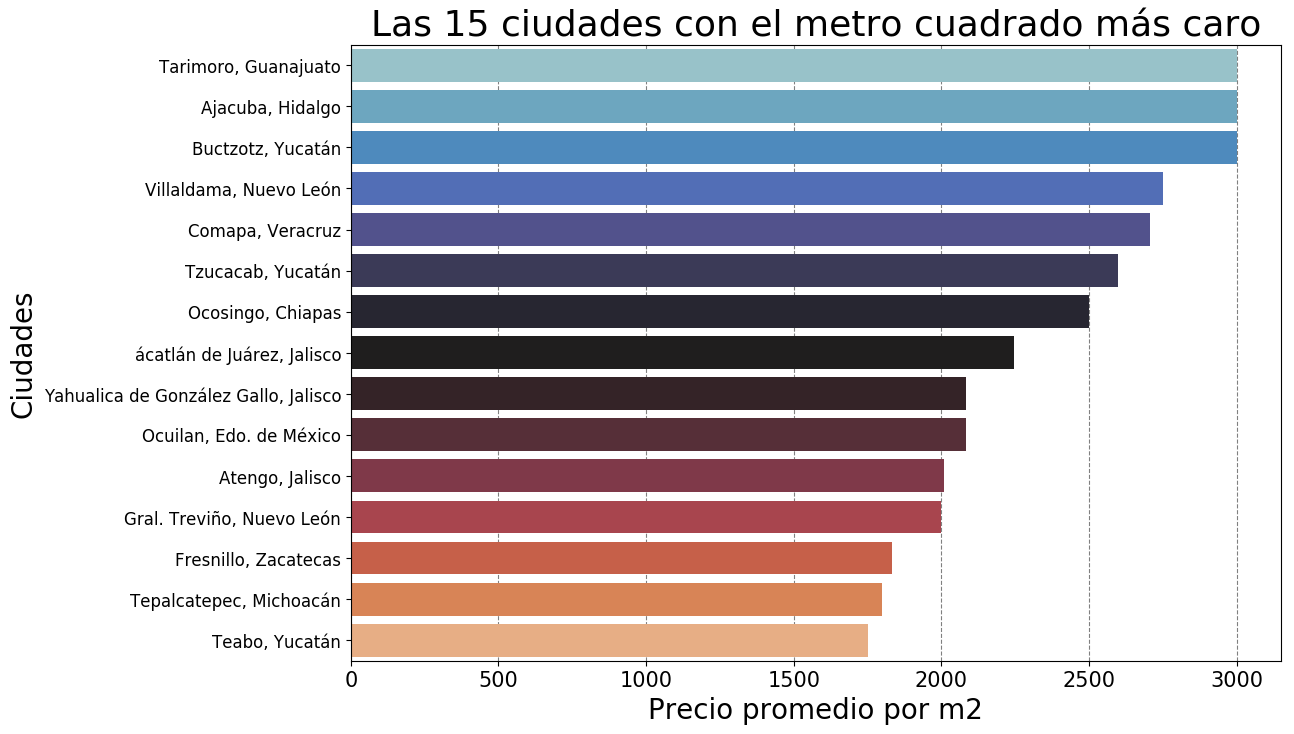

In [76]:
top_15_m2_por_ciudad = media_m2_por_ciudad.head(15)

plot_ciudades(top_15_m2_por_ciudad, 'caro')

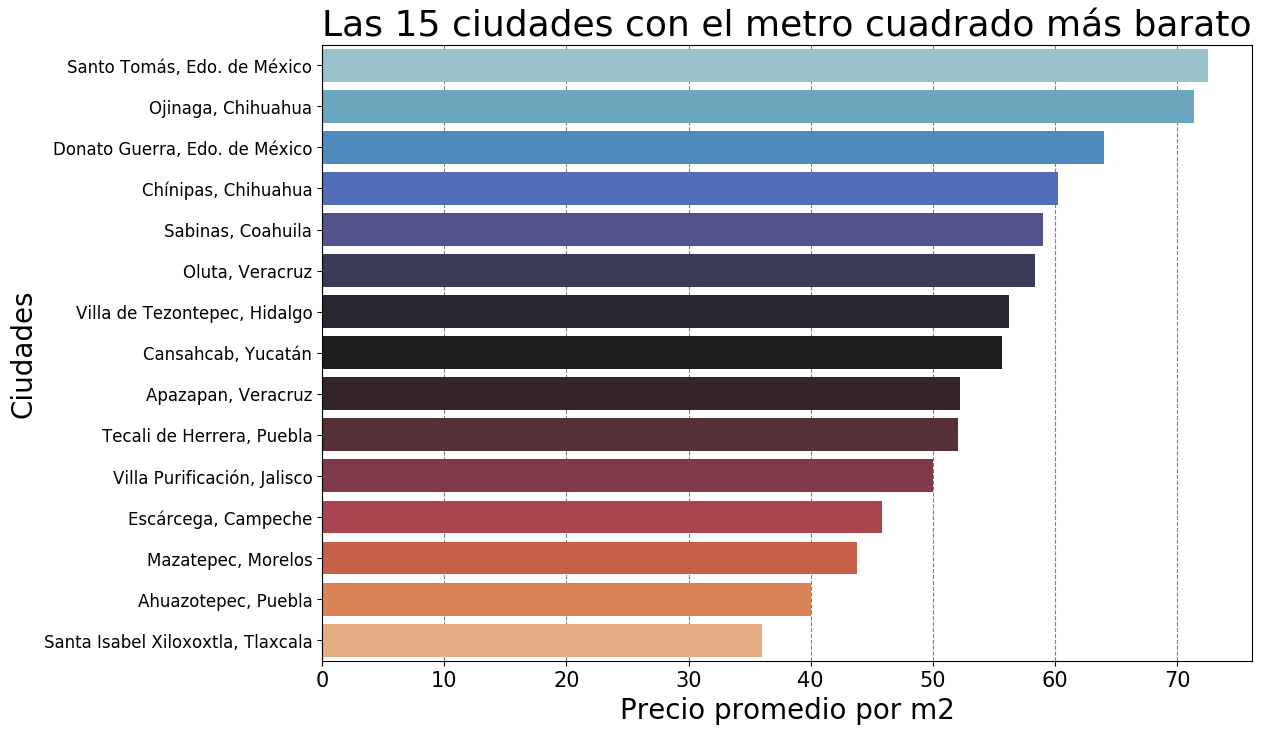

In [77]:
bottom_15_m2_por_ciudad = media_m2_por_ciudad.tail(15)

plot_ciudades(bottom_15_m2_por_ciudad, 'barato')

Vemos que las ciudades con el metro cuadrado más caro, no pertecen a provincias caras, lo que a priori da a entender que hay una gran diferencia de precios entre ciudades de una misma provincia. Lo mismo sucede con las ciudades más baratas.

Por el contrario, provincias como Distrito Federal, que tiene el metro cuadrado más caro, no figura en ningún plot, por lo que parece que los precios son más uniformes entre ciudades que pertenecen a dicha provincia.
Además vemos una gran diferencia entre las ciudades más caras, a diferencia de las más baratas, donde parecen más parejas. Esto puede tener que ver con el filtro del percentil aplicado anteriormente, a medida que son más caras, más diferencia en los precios.